### Let's open the Turlock AOD 1.5 Data. The 1.5 does not have a quality check on them compared to 2.0.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from datetime import datetime, timedelta
import matplotlib
import pytz
from zoneinfo import ZoneInfo
import matplotlib.dates as mdates

filename = '20230101_20231231_Turlock_CA_USA.tot_lev15'

# Load Files 
df = pd.read_csv(filename,skiprows = 6, parse_dates={'datetime':[0,1]})
datetime_utc=pd.to_datetime(df["datetime"], format='%d:%m:%Y %H:%M:%S')
#print(datetime_pac.head())
datetime_pac= pd.to_datetime(datetime_utc).dt.tz_localize('UTC').dt.tz_convert('US/Pacific')
#print(datetime_pac.head())

df.set_index(datetime_pac, inplace = True)
#print(df.head())  

AODTotalColumns=range(3,173,8)
for iWaveLength in df.columns[AODTotalColumns]: print(iWaveLength) #Print out the List of Wavelength with AOD Total

AOD_1640nm-Total
AOD_1020nm-Total
AOD_870nm-Total
AOD_865nm-Total
AOD_779nm-Total
AOD_675nm-Total
AOD_667nm-Total
AOD_620nm-Total
AOD_560nm-Total
AOD_555nm-Total
AOD_551nm-Total
AOD_532nm-Total
AOD_531nm-Total
AOD_510nm-Total
AOD_500nm-Total
AOD_490nm-Total
AOD_443nm-Total
AOD_440nm-Total
AOD_412nm-Total
AOD_400nm-Total
AOD_380nm-Total
AOD_340nm-Total


### Now let's make a plot of all the AOD Total for Different Wavelengths.

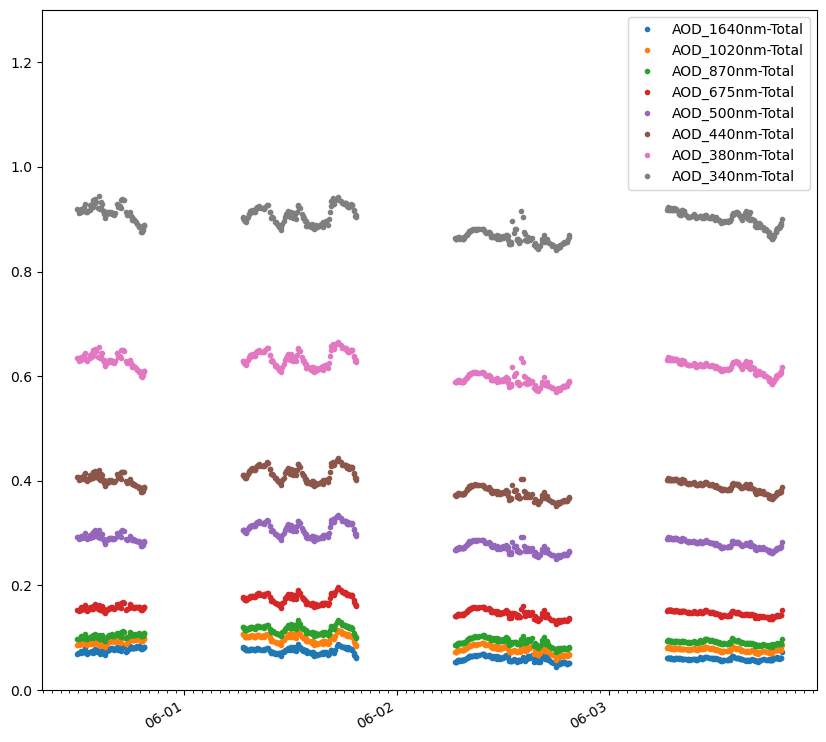

In [2]:
plt.figure(figsize=(10,10))   
#df[80:130]
for iWaveLength in df.columns[AODTotalColumns]: 
    if(df[iWaveLength].mean() > 0):
        #print(iWaveLength])
        plt.plot(df[iWaveLength][0:494],'.',label=iWaveLength)

plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1, tz='US/Pacific'))
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=1, tz='US/Pacific'))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ylim(0,1.3)
plt.legend()
plt.show()


### There doesn't seem to be a big dependency on the wavelengths. So let's focus on the visible range only.

#### The reason that the minor and major locator tick does not line is up due to a bug since Python 3.5.2 where the HourLocator cannot do timezone correction. So its actually ploting those 3 hours tick marks in UTC. Due to the 7 hours time zone difference, it results in an 1 hour difference in the placement of the hourly tick mark relative to the Day (midnight) mark.

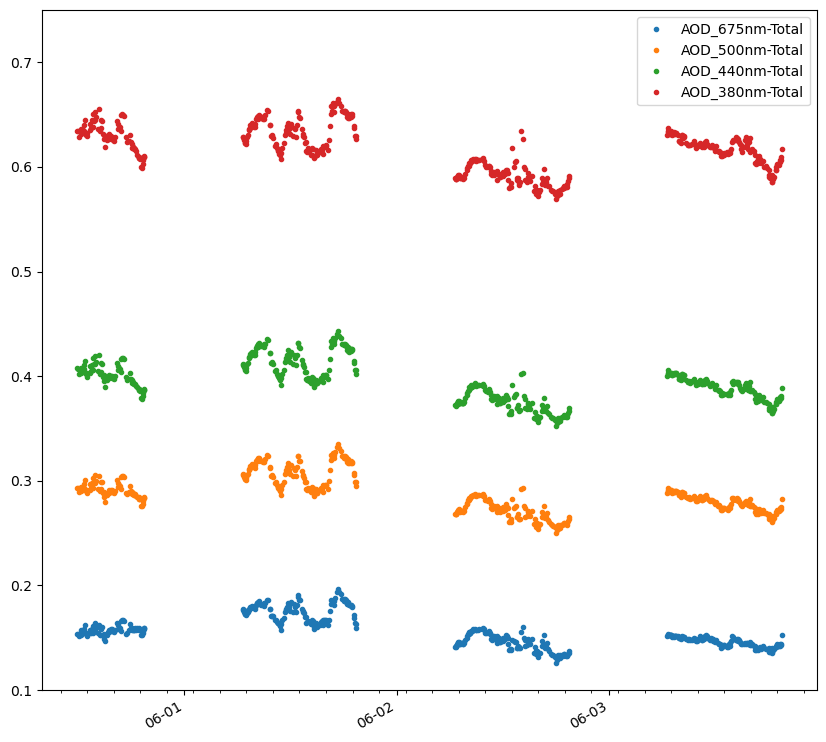

In [3]:
plt.figure(figsize=(10,10))  
for iWaveLength in df.columns[AODTotalColumns[3:-1]]: 
    if(df[iWaveLength].mean() > 0):
        #print(iWaveLength])
        plt.plot(df[iWaveLength][0:494],'.',label=iWaveLength)

plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1, tz='US/Pacific'))
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=3, tz='US/Pacific'))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%H'))
plt.ylim(0.1,0.75)
plt.legend()
plt.show()

### Now, let's pick a starting time and ending time instead of the DF's index to cut on the plot.

#### This plot has some interesting uptake on the AOD on June 6th and 7th.

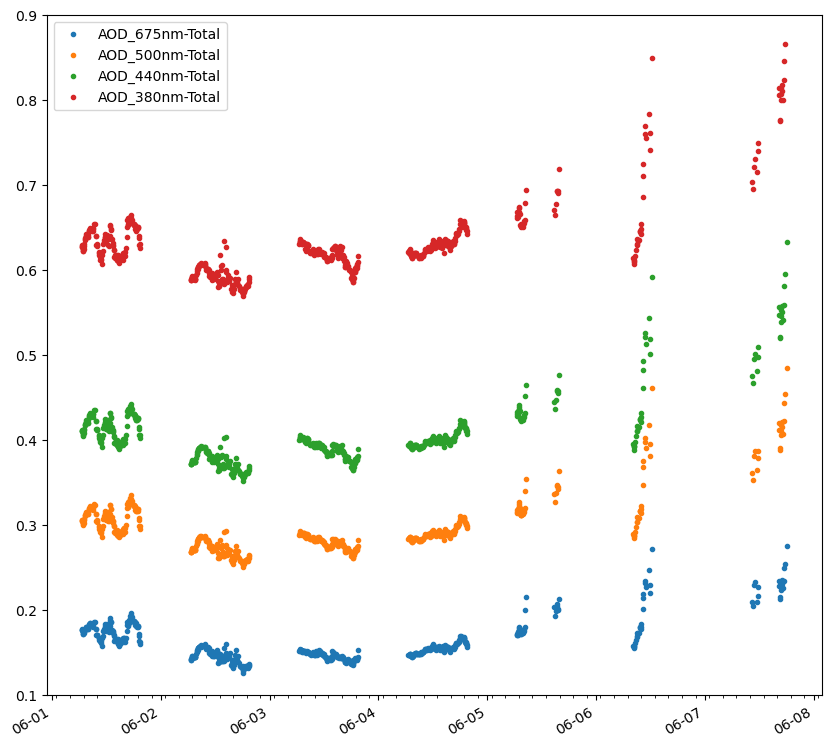

In [16]:
StartDate='2023-06-01'
EndDate='2023-06-07'

plt.figure(figsize=(10,10))  
for iWaveLength in df.columns[AODTotalColumns[3:-1]]: 
    if(df[iWaveLength].mean() > 0):
        #print(iWaveLength])
        plt.plot(df.loc[StartDate:EndDate,iWaveLength],'.',label=iWaveLength)
        #plt.plot(df[iWaveLength][0:94],'.',label=iWaveLength)

plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1, tz='US/Pacific'))
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=3, tz='US/Pacific'))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ylim(0.1,0.9)
plt.legend()
plt.show()

### Now let's do an hourly average of the data.

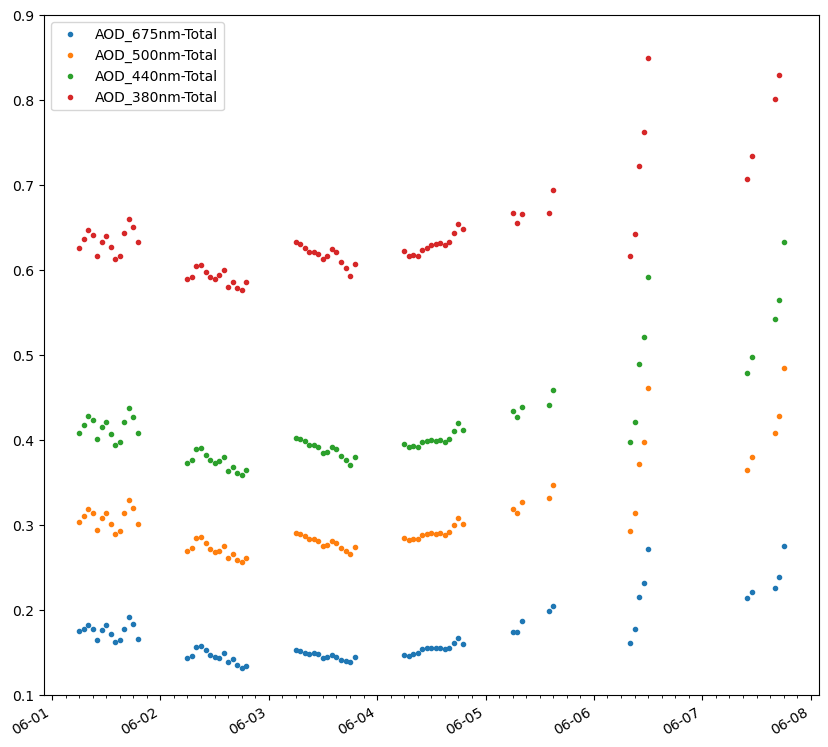

In [59]:
StartDate='2023-06-01'
EndDate='2023-06-07'
#print(df.loc[StartDate:EndDate,'AOD_440nm-Total'].resample('1h').mean())

plt.figure(figsize=(10,10))  
for iWaveLength in df.columns[AODTotalColumns[3:-1]]: 
    if(df[iWaveLength].mean() > 0):
        #print(iWaveLength)
        plt.plot(df.loc[StartDate:EndDate,iWaveLength].resample('1h').mean(),'.',label=iWaveLength)
        #plt.plot(df[iWaveLength][0:94],'.',label=iWaveLength)

plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1, tz='US/Pacific'))
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=3, tz='US/Pacific'))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ylim(0.1,0.9)
plt.legend()
plt.show()


### Repeat for 3 Hour Averaging.

#### Note that now we're at the point where we have 5 data points some days, 4 or 3 depending on how long the instrument takes data for. This is fairly annoying to fix and Anthony already did it so I will move on to Daily Averages.

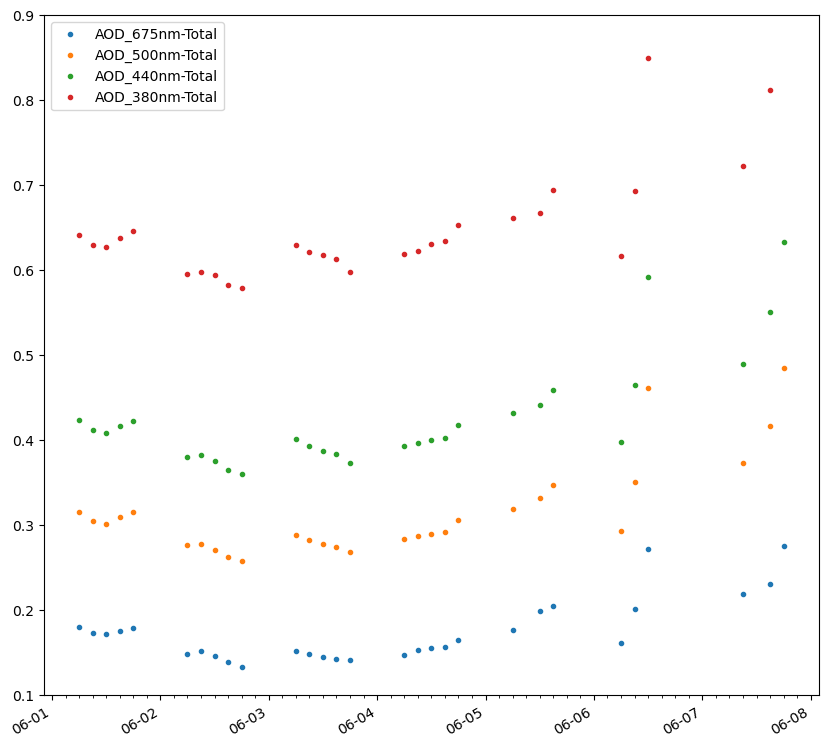

In [62]:
StartDate='2023-06-01 07:00:00'
EndDate='2023-06-07 19:00:00'
#print(df.loc[StartDate:EndDate,'AOD_440nm-Total'].resample('1h').mean())

plt.figure(figsize=(10,10))  
for iWaveLength in df.columns[AODTotalColumns[3:-1]]: 
    if(df[iWaveLength].mean() > 0):
        #print(iWaveLength)
        plt.plot(df.loc[StartDate:EndDate,iWaveLength].resample('3h', ).mean(),'.',label=iWaveLength)
        #plt.plot(df[iWaveLength][0:94],'.',label=iWaveLength)

plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1, tz='US/Pacific'))
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=3, tz='US/Pacific'))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ylim(0.1,0.9)
plt.legend()
plt.show()


### Plotting the Daily averages for the entire 1.3 Months.

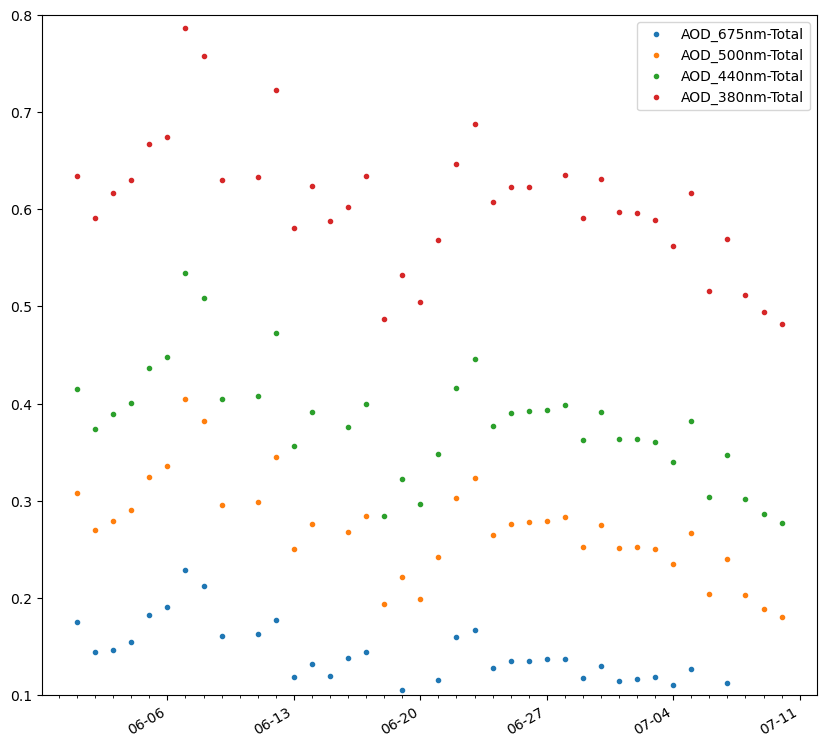

In [70]:
StartDate='2023-06-01'
EndDate='2023-07-10'

plt.figure(figsize=(10,10))  
for iWaveLength in df.columns[AODTotalColumns[3:-1]]: 
    if(df[iWaveLength].mean() > 0):
        #print(iWaveLength)
        plt.plot(df.loc[StartDate:EndDate,iWaveLength].resample('1D', ).mean(),'.',label=iWaveLength)
        #plt.plot(df[iWaveLength][0:94],'.',label=iWaveLength)

plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7, tz='US/Pacific'))
plt.gca().xaxis.set_minor_locator(mdates.DayLocator(interval=1, tz='US/Pacific'))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ylim(0.1,0.8)
plt.legend()
plt.show()
